In [1]:
!pip install tensorflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.
pydrive2 1.21.3 requires pyOpenSSL<=24.2.1,>=19.1.0, but you have pyopenssl 25.3.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.10.0 wh

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 54.26 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


2025-12-01 20:49:51.548576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764622191.789258      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764622191.868258      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


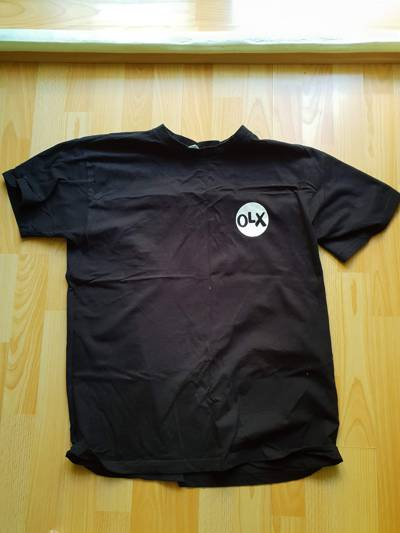

In [4]:
path = "/kaggle/working/clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"

fullname = f"{path}/{name}"

# load the image
load_img(fullname)

In [5]:
# resizing an image
resized_img = load_img(fullname, target_size=(299, 299))

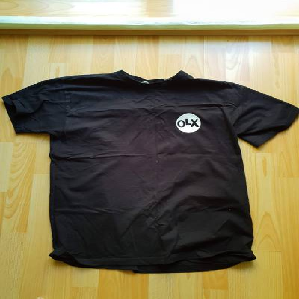

In [6]:
resized_img

In [7]:
# converting image to an array
x = np.array(resized_img)
x.shape

(299, 299, 3)

### Pre-trained convolutional neural networks

In [8]:
# import a pre-trained model from keras applications
from tensorflow.keras.applications.xception import Xception
# import preprocess function
from tensorflow.keras.applications.xception import preprocess_input
# decode predictions
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
# create the model
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1764622209.385888      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764622209.386494      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
# preprocess X for the model
X = preprocess_input(X)

In [12]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [13]:
pred = model.predict(X)

I0000 00:00:1764622213.461413      80 service.cc:148] XLA service 0x785408001510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764622213.462306      80 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764622213.462328      80 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764622213.913532      80 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1764622216.702743      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.6819633),
  ('n02916936', 'bulletproof_vest', 0.038140036),
  ('n04370456', 'sweatshirt', 0.034324724),
  ('n03710637', 'maillot', 0.011354209),
  ('n04525038', 'velvet', 0.0018453574)]]

### **Transfer Learning**

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
# read dataset from directory
train_df = train_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/train/", 
                              target_size=(150, 150), 
                              batch_size=32)

Found 3068 images belonging to 10 classes.


In [18]:
# to check class indices
train_df.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_df)

In [20]:
X.shape, y.shape

((32, 150, 150, 3), (32, 10))

In [21]:
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_df = val_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/validation/",
                                    target_size=(150,150),
                                    batch_size=32,
                                    shuffle=False)

# test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
# test_df = test_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/test/",
#                                       target_size=(150,150),
#                                       batch_size=32)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(150, 150, 3)
                     )
base_model.trainable=False # don't train convolutional layers

# creating a new top
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False) # create outputs
# pooling into 1D vector
vectors = keras.layers.GlobalAveragePooling2D()(base)
# Dense layer to get preds
outputs = keras.layers.Dense(10)(vectors) #(num_classes, 1D vects)

# apply to new model (train a new model)
model = keras.Model(inputs, outputs)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# optimize
learning_rate = 0.01
optimizer= keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

# compile
model.compile(optimizer=optimizer, 
             loss=loss,
             metrics=['accuracy'])

In [25]:
# train model
history = model.fit(train_df, epochs=10, validation_data=val_df)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - accuracy: 0.5629 - loss: 1.8292 - val_accuracy: 0.7419 - val_loss: 0.9266
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.8266 - loss: 0.5139 - val_accuracy: 0.7859 - val_loss: 0.8062
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9172 - loss: 0.2654 - val_accuracy: 0.7537 - val_loss: 0.9866
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8887 - loss: 0.3140 - val_accuracy: 0.8211 - val_loss: 0.9488
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9335 - loss: 0.1763 - val_accuracy: 0.7478 - val_loss: 1.1945
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9284 - loss: 0.2144 - val_accuracy: 0.8035 - val_loss: 0.8625
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9565 - loss: 0.1258 - val_accuracy: 0.8358 - val_loss: 0.7801
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9888 - loss: 0.0492 - val_accuracy: 0.7771 - val_loss: 

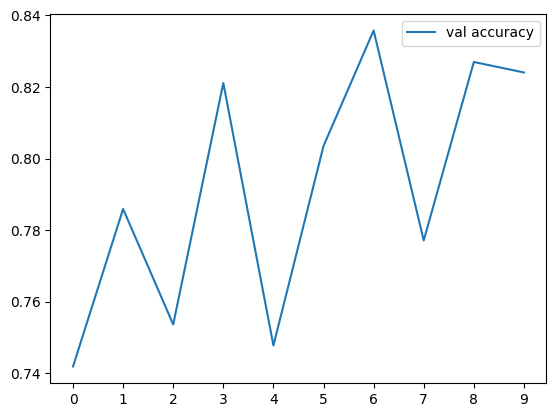

In [26]:
# plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xticks(np.arange(10))
plt.legend()

### **Adjusting the Learning Rate**

In [27]:
def make_model(learning_rate):
    # pre-trained boilerplate
    base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(150, 150, 3)
                     )
    base_model.trainable=False
    
    # new model architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    # new model compiling 
    optimizer= keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                 loss=loss,
                 metrics=['accuracy'])
    
    return model

In [28]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    model = make_model(learning_rate=lr)
    history = model.fit(train_df, epochs=10, validation_data=val_df)
    scores[lr] = history.history

    print()
    print()

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.1814 - loss: 2.2897 - val_accuracy: 0.4751 - val_loss: 1.6641
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5286 - loss: 1.4971 - val_accuracy: 0.5865 - val_loss: 1.2977
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.6269 - loss: 1.2025 - val_accuracy: 0.6422 - val_loss: 1.1072
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.6800 - loss: 1.0510 - val_accuracy: 0.6921 - val_loss: 0.9885
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6908 - loss: 0.9500 - val_accuracy: 0.7185 - val_loss: 0.9094
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7279 - loss: 0.8590 - val_accuracy: 0.7273 - val_loss: 0.8513
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7346 - loss: 0.8067 - val_accuracy: 0.7537 - val_loss: 0.8093
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7569 - loss: 0.7571 - val_accuracy: 0.7595 -

In [29]:
for lr, hist in scores.items():
    print(lr)
    print(hist)

0.0001
{'accuracy': [0.30867013335227966, 0.5446544885635376, 0.633637547492981, 0.6805736422538757, 0.7073011994361877, 0.7284876108169556, 0.7431551218032837, 0.7578226923942566, 0.7692307829856873, 0.7777053713798523], 'loss': [2.0275278091430664, 1.4328831434249878, 1.1700721979141235, 1.020573377609253, 0.9219918251037598, 0.8499217629432678, 0.7951549291610718, 0.7508508563041687, 0.7131105661392212, 0.6822706460952759], 'val_accuracy': [0.47507330775260925, 0.5865102410316467, 0.6422287225723267, 0.6920821070671082, 0.7184750437736511, 0.7272727489471436, 0.7536656856536865, 0.759530782699585, 0.7800586223602295, 0.7771260738372803], 'val_loss': [1.664062738418579, 1.2976754903793335, 1.1071934700012207, 0.9885478615760803, 0.9094278812408447, 0.8513073325157166, 0.8093195557594299, 0.7748291492462158, 0.7489029169082642, 0.7245785593986511]}
0.001
{'accuracy': [0.6355932354927063, 0.7773793935775757, 0.832138180732727, 0.8644067645072937, 0.8875488638877869, 0.9097131490707397,

In [30]:
del scores[0.1]
del scores[0.0001]

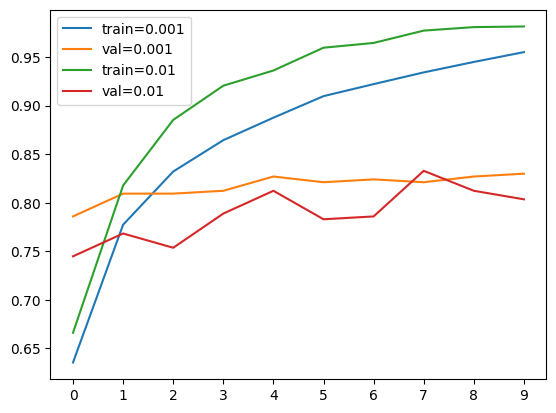

In [31]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=f'train={lr}')
    plt.plot(hist['val_accuracy'], label=f'val={lr}')

plt.xticks(np.arange(10))
plt.legend()

### **Checkpointing**

In [32]:
# model.save('model_v1.keras') # saving the full model using the keras format
# model.save_weights('model_v1.weights.h5') # using .h5 format to save only the weights?

In [33]:
# checkpoint = keras.callbacks.ModelCheckpoint(
#     'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5', 
#     save_best_only=True,
#     monitor='val_accuracy',
#     mode='max'
# )

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [34]:
lr = 0.001

model = make_model(learning_rate=lr)

history = model.fit(
    train_df, 
    epochs=10, 
    validation_data=val_df,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.5100 - loss: 1.4710 - val_accuracy: 0.7654 - val_loss: 0.7104
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7749 - loss: 0.6617 - val_accuracy: 0.7947 - val_loss: 0.6178
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8232 - loss: 0.5243 - val_accuracy: 0.8035 - val_loss: 0.5775
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8714 - loss: 0.4135 - val_accuracy: 0.8152 - val_loss: 0.5656
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8963 - loss: 0.3445 - val_accuracy: 0.8065 - val_loss: 0.5566
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9019 - loss: 0.3404 - val_accuracy: 0.8270 - val_loss: 0.5250
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9204 - loss: 0.2922 - val_accuracy: 0.8211 - val_loss: 0.5379
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9392 - loss: 0.2536 - val_accuracy: 0.8094 -

### **Adding more layers**

In [35]:
def make_model(learning_rate, inner_size=100):
    # pre-trained boilerplate
    base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(150, 150, 3)
                     )
    base_model.trainable=False
    
    # new model architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    # new model compiling 
    optimizer= keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                 loss=loss,
                 metrics=['accuracy'])
    
    return model

In [36]:
lr = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(f"Training at inner dense layer size: {size}\n")
    model = make_model(learning_rate=lr, inner_size=size)
    history = model.fit(train_df, 
                        epochs=10, 
                        validation_data=val_df)
    scores[size] = history.history

    print()
    print()

Training at inner dense layer size: 10

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.4161 - loss: 1.7586 - val_accuracy: 0.6070 - val_loss: 1.1478
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6794 - loss: 0.9970 - val_accuracy: 0.6979 - val_loss: 0.9205
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7321 - loss: 0.7971 - val_accuracy: 0.7449 - val_loss: 0.8053
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.7935 - loss: 0.6698 - val_accuracy: 0.7595 - val_loss: 0.7426
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8124 - loss: 0.5789 - val_accuracy: 0.7654 - val_loss: 0.6917
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8465 - loss: 0.4886 - val_accuracy: 0.7889 - val_loss: 0.6719
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.8673 - loss: 0.4337 - val_accuracy: 0.7918 - val_loss: 0.6413
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8869

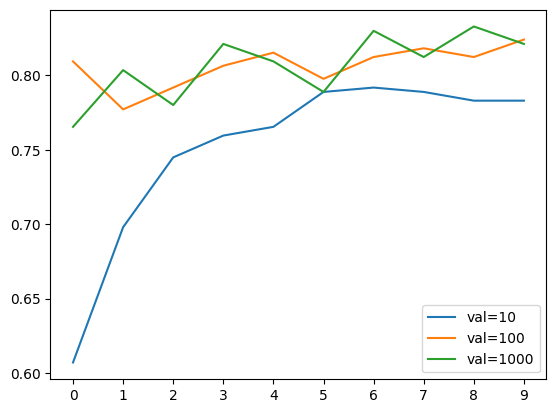

In [37]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=f'train={size}')
    plt.plot(hist['val_accuracy'], label=f'val={size}')

plt.xticks(np.arange(10))
plt.legend()

### **Regularization and Dropout**

In [38]:
def make_model(learning_rate, drop_rate, inner_size=100):
    # pre-trained boilerplate
    base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(150, 150, 3)
                     )
    base_model.trainable=False
    
    # new model architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # dense layer
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    # dropout
    drop = keras.layers.Dropout(drop_rate)(inner)
    # output
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    # new model compiling 
    optimizer= keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                 loss=loss,
                 metrics=['accuracy'])
    
    return model

In [39]:
lr = 0.001
size = 100
scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f"Training with dropout: {droprate}\n")
    model = make_model(learning_rate=lr, inner_size=size, drop_rate=droprate)
    
    history = model.fit(train_df, 
                        epochs=30, 
                        validation_data=val_df)
    
    scores[droprate] = history.history

    print()
    print()

Training with dropout: 0.0

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - accuracy: 0.5872 - loss: 1.2518 - val_accuracy: 0.7801 - val_loss: 0.6712
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8134 - loss: 0.5461 - val_accuracy: 0.8006 - val_loss: 0.5564
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8801 - loss: 0.3612 - val_accuracy: 0.7771 - val_loss: 0.6218
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9196 - loss: 0.2599 - val_accuracy: 0.8065 - val_loss: 0.5342
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9488 - loss: 0.1885 - val_accuracy: 0.8182 - val_loss: 0.5492
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9685 - loss: 0.1420 - val_accuracy: 0.8123 - val_loss: 0.5765
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9847 - loss: 0.0903 - val_accuracy: 0.8123 - val_loss: 0.5912
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9907 - loss: 0.0

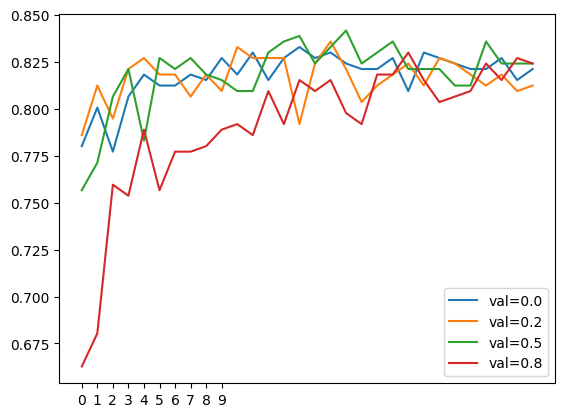

In [40]:
for droprate, hist in scores.items():
    # plt.plot(hist['accuracy'], label=f'train={size}')
    plt.plot(hist['val_accuracy'], label=f'val={droprate}')

plt.xticks(np.arange(10))
# plt.ylim(0.78, 0.86)
plt.legend()

# best dropoit rate = 0.2

### **Data Augmentation**

In [41]:
# augment the images
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
                              )

# read dataset from directory
train_df = train_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/train/", 
                              target_size=(150, 150), 
                              batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_df = val_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/validation/",
                                    target_size=(150,150),
                                    batch_size=32,
                                    shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [42]:
lr = 0.001
size = 100
droprate = 0.2

# create model
model = make_model(learning_rate=lr, 
                   inner_size=size, 
                   drop_rate=droprate)
# train model
history = model.fit(train_df, 
                    epochs=50, 
                    validation_data=val_df)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 251ms/step - accuracy: 0.4551 - loss: 1.6297 - val_accuracy: 0.7331 - val_loss: 0.8076
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.6896 - loss: 0.9184 - val_accuracy: 0.7713 - val_loss: 0.7121
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.7234 - loss: 0.8126 - val_accuracy: 0.7625 - val_loss: 0.7528
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - accuracy: 0.7473 - loss: 0.7301 - val_accuracy: 0.7801 - val_loss: 0.6488
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.7697 - loss: 0.6768 - val_accuracy: 0.7771 - val_loss: 0.6587
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.8052 - loss: 0.5782 - val_accuracy: 0.7889 - val_loss: 0.6247
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.8064 - loss: 0.5612 - val_accuracy: 0.7977 - val_loss: 0.6232
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.8251 - loss: 0.5297 - val_accu

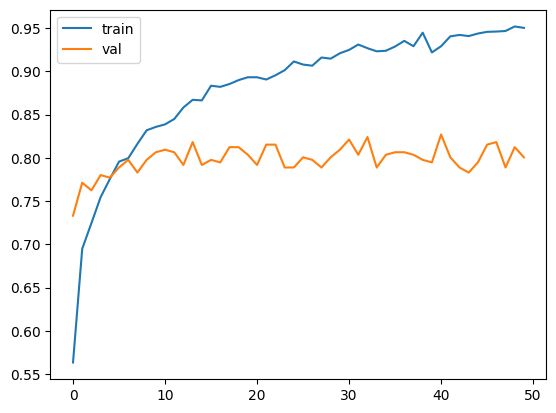

In [43]:
hist = history.history
plt.plot(hist['accuracy'], label='train')
plt.plot(hist['val_accuracy'], label='val')

# plt.xticks(np.arange(10))
# plt.ylim(0.78, 0.86)
plt.legend()

### **Training a Larger Model (299x299)**

In [44]:
def make_model(input_size=150, inner_size=100, learning_rate=0.01, drop_rate=0.5):
    # pre-trained boilerplate
    base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(input_size, input_size, 3)
                     )
    base_model.trainable=False
    
    # new model architecture
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # dense layer
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    # dropout
    drop = keras.layers.Dropout(drop_rate)(inner)
    # output
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    # new model compiling 
    optimizer= keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                 loss=loss,
                 metrics=['accuracy'])
    
    return model

In [45]:
input_size = 299
# augment the images
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
                              )

# read dataset from directory
train_df = train_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/train/", 
                              target_size=(input_size, input_size), 
                              batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_df = val_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/validation/",
                                    target_size=(input_size,input_size),
                                    batch_size=32,
                                    shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [46]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.keras', 
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [47]:
lr = 0.0005
size = 100
droprate = 0.2
input_size = 299

# create model
model = make_model(input_size=input_size,
                   learning_rate=lr, 
                   inner_size=size, 
                   drop_rate=droprate)
# train model
history = model.fit(
    train_df, 
    epochs=50, 
    validation_data=val_df,
    callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 108s 931ms/step - accuracy: 0.4644 - loss: 1.6235 - val_accuracy: 0.7977 - val_loss: 0.6622
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 676ms/step - accuracy: 0.7299 - loss: 0.7935 - val_accuracy: 0.8299 - val_loss: 0.5301
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 670ms/step - accuracy: 0.7743 - loss: 0.6566 - val_accuracy: 0.8446 - val_loss: 0.4685
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 669ms/step - accuracy: 0.8133 - loss: 0.5771 - val_accuracy: 0.8504 - val_loss: 0.4576
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 676ms/step - accuracy: 0.8217 - loss: 0.5322 - val_accuracy: 0.8446 - val_loss: 0.4420
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 653ms/step - accuracy: 0.8383 - loss: 0.4749 - val_accuracy: 0.8387 - val_loss: 0.4446
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 673ms/step - accuracy: 0.8366 - loss: 0.4820 - val_accuracy: 0.8534 - val_loss: 0.4399
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 672ms/step - accuracy: 0.8461 - loss: 0.4577 - val_acc

### **Using the model**

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [49]:
model = keras.models.load_model('/kaggle/input/xception-v4/keras/default/1/xception_v4_10_0.871.keras')

In [50]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory("/kaggle/working/clothing-dataset-small/test/",
                                    target_size=(299,299),
                                    batch_size=32,
                                    shuffle=False)

Found 372 images belonging to 10 classes.


In [51]:
model.evaluate(test_ds) # result gives [loss, accuracy]

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8414 - loss: 0.4311


[0.3296400010585785, 0.8763440847396851]

In [52]:
# apply to an image
path = '/kaggle/working/clothing-dataset-small/test/pants/122f0c94-4f37-4010-8c43-06d79bdf4433.jpg'

In [53]:
img = load_img(path, target_size=(299, 299))

In [54]:
import numpy as np
X = np.array(img)
X = np.array([X])
X.shape

(1, 299, 299, 3)

In [55]:
X = preprocess_input(X)

In [56]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [57]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
    ]

In [58]:
dict(zip(classes, preds[0]))

{'dress': -2.1083724,
 'hat': -3.9641478,
 'longsleeve': -1.257342,
 'outwear': -1.2605228,
 'pants': 5.5636783,
 'shirt': -1.1987226,
 'shoes': -2.8312683,
 'shorts': 1.8012984,
 'skirt': -1.533359,
 't-shirt': -3.1475415}